In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 21.6 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

from cartopy.util import add_cyclic_point
from matplotlib import animation
from tqdm.auto import tqdm
from datetime import datetime,timedelta

In [ ]:
import  xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import warnings
import math
from tqdm.auto import tqdm
from tqdm.auto import tqdm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Daily maximums


In [ ]:
# Data used here are too big to share.
# commented so it doesn't run. It takes a lot of time.
# import os
# from tqdm.auto import tqdm
# directory_path='/content/drive/MyDrive/AP_HW/ERA5 Data/t2m_d2m_sp'

# t2m_list=[]
# for filename in tqdm(sorted(os.listdir(directory_path))):
#   if filename.endswith('.nc'):
#     filepath=os.path.join(directory_path,filename)
#     ds=xr.open_dataset(filepath)
#     year=int(filename[11:-3])
#     lat_range=slice(26.5,20.75)
#     lon_range=slice(88,92.5)
#     ds_t2m=ds.t2m.sel(latitude=lat_range,longitude=lon_range)
#     ds_t2m_bdt=ds_t2m.shift(time=6)
#     ds_t2m_C=ds_t2m_bdt-273.15
#     ds_t2m_C=ds_t2m_C.assign_attrs(ds_t2m.attrs)
#     ds_t2m_C.attrs['units']= '° C'
#     tmax_ds_daily=ds_t2m_C.resample(time='D').max()
#     t2m_list.append(tmax_ds_daily)
# max_t2m_no_mask=xr.concat(t2m_list,dim='time')
# max_t2m_no_mask.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/max_t2m_no_mask.nc')

In [ ]:
# ds=xr.open_mfdataset('/content/drive/MyDrive/AP_HW/ERA5 Data/EPT/*.nc')
# lat_range=slice(26.5,20.75)
# lon_range=slice(88,92.5)
# ds_ept=ds.ept.sel(latitude=lat_range,longitude=lon_range)
# ds_ept_bdt=ds_ept.shift(time=6)
# ds_ept_bdt
# ds_ept_bdt.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/max_ept_no_mask.nc')


<xarray.DataArray 'ept' (time: 473376, latitude: 24, longitude: 19)> Size: 2GB
dask.array<rechunk-merge, shape=(473376, 24, 19), dtype=float64, chunksize=(8784, 24, 19), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 4MB 1971-01-01 ... 2024-12-31T23:00:00
  * latitude   (latitude) float32 96B 26.5 26.25 26.0 25.75 ... 21.25 21.0 20.75
  * longitude  (longitude) float32 76B 88.0 88.25 88.5 88.75 ... 92.0 92.25 92.5
Attributes:
    units:      K
    long_name:  Equivalent potential temperature

In [ ]:
# wbts=xr.open_mfdataset('/content/drive/MyDrive/AP_HW/Scripts-ll/WBT/wbt_files/*.nc')
# lat_range=slice(26.5,20.75)
# lon_range=slice(88,92.5)
# wbt_ds=wbts.wbt.sel(latitude=lat_range,longitude=lon_range)
# wbt_ds.to_netcdf('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/max_wbt_no_mask.nc')

In [ ]:
ds_ept =xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/max_ept_no_mask.nc')
ds_t2m =xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/max_t2m_no_mask.nc')
ds_wbt =xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/HW_dates/data/max_wbt_no_mask.nc')
ds_wbt

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 356400, latitude: 24, longitude: 19)
Coordinates:
  * time       (time) datetime64[ns] 3MB 1971-03-01 ... 2024-11-30T23:00:00
  * latitude   (latitude) float32 96B 26.5 26.25 26.0 25.75 ... 21.25 21.0 20.75
  * longitude  (longitude) float32 76B 88.0 88.25 88.5 88.75 ... 92.0 92.25 92.5
Data variables:
    wbt        (time, latitude, longitude) float64 1GB ...

In [ ]:
ds_ept_degC=ds_ept-273.15
ds_t2m_degC=ds_t2m.copy()
ds_wbt_degC=ds_wbt-273.15
ds_wbt_degC

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 356400, latitude: 24, longitude: 19)
Coordinates:
  * time       (time) datetime64[ns] 3MB 1971-03-01 ... 2024-11-30T23:00:00
  * latitude   (latitude) float32 96B 26.5 26.25 26.0 25.75 ... 21.25 21.0 20.75
  * longitude  (longitude) float32 76B 88.0 88.25 88.5 88.75 ... 92.0 92.25 92.5
Data variables:
    wbt        (time, latitude, longitude) float64 1GB 13.75 13.64 ... 23.94

In [ ]:
ds_ept_daily_max=ds_ept_degC.ept.resample(time='D').max()
ds_t2m_daily_max=ds_t2m_degC.t2m.resample(time='D').max()
ds_wbt_daily_max=ds_wbt_degC.wbt.resample(time='D').max()
ds_wbt_daily_max

<xarray.DataArray 'wbt' (time: 19634, latitude: 24, longitude: 19)> Size: 72MB
array([[[16.95442377, 16.8721748 , 16.88612484, ..., 17.34108045,
         17.36065785, 17.3201354 ],
        [17.24782351, 17.21407302, 17.55234377, ..., 17.22272825,
         17.21277226, 17.19897056],
        [17.45010473, 17.43370716, 17.33914804, ..., 16.52589206,
         16.17447643, 16.32413397],
        ...,
        [22.31110465, 22.2758488 , 22.2415847 , ..., 20.36005363,
         19.46417806, 18.82888567],
        [22.11383433, 22.22284399, 22.14989287, ..., 20.57772325,
         20.17995561, 19.37998198],
        [22.22477002, 22.22287463, 22.2191957 , ..., 20.96554175,
         20.94109852, 20.47786584]],

       [[16.36857546, 15.49680123, 15.03454063, ..., 17.25639859,
         17.33253808, 17.28470374],
        [16.655536  , 15.9892174 , 15.84362045, ..., 17.05053273,
         17.08155352, 17.01754956],
        [16.79437461, 16.4822634 , 16.01727055, ..., 15.33729036,
         15.38642767, 15.9683811 ],
...
        [21.56911096, 21.72960339, 21.87965435, ..., 24.27325817,
         24.87175347, 24.57416083],
        [21.99712322, 22.08611593, 22.17882019, ..., 24.19495216,
         24.28343077, 24.83716717],
        [22.41431737, 22.45594067, 22.51489748, ..., 23.92311669,
         24.08694168, 25.16199706]],

       [[17.39131718, 17.615227  , 17.96299053, ..., 17.48660007,
         18.09259836, 18.45419089],
        [17.80001229, 18.12884892, 18.73537159, ..., 18.5399347 ,
         18.84422289, 19.22624934],
        [17.83382984, 18.11681707, 18.39956535, ..., 18.87931569,
         18.94945264, 19.4218399 ],
        ...,
        [21.54627831, 21.66002925, 21.7662989 , ..., 24.44066184,
         24.85737618, 24.58777827],
        [22.06528681, 22.11909519, 22.19526388, ..., 24.06449142,
         24.70931186, 25.06677716],
        [22.57176828, 22.59420596, 22.61651187, ..., 24.05275155,
         24.22409174, 25.55884446]]])
Coordinates:
  * latitude   (latitude) float32 96B 26.5 26.25 26.0 25.75 ... 21.25 21.0 20.75
  * longitude  (longitude) float32 76B 88.0 88.25 88.5 88.75 ... 92.0 92.25 92.5
  * time       (time) datetime64[ns] 157kB 1971-03-01 1971-03-02 ... 2024-11-30

In [ ]:
weights=np.cos(np.deg2rad(ds_ept_daily_max.latitude))
weights.name='weights'
daily_ept_weighted = ds_ept_daily_max.weighted(weights)
BD_mean_max_ept = daily_ept_weighted.mean(['longitude','latitude'])
BD_mean_max_ept

weights=np.cos(np.deg2rad(ds_t2m_daily_max.latitude))
weights.name='weights'
daily_t2m_weighted = ds_t2m_daily_max.weighted(weights)
BD_mean_max_t2m = daily_t2m_weighted.mean(['longitude','latitude'])
BD_mean_max_t2m

weights=np.cos(np.deg2rad(ds_wbt_daily_max.latitude))
weights.name='weights'
daily_wbt_weighted = ds_wbt_daily_max.weighted(weights)
BD_mean_max_wbt = daily_wbt_weighted.mean(['longitude','latitude'])
BD_mean_max_wbt

<xarray.DataArray 'wbt' (time: 19634)> Size: 157kB
array([19.14868015, 17.7543237 , 18.26608352, ..., 21.03694571,
       21.56438458, 21.34329368])
Coordinates:
  * time     (time) datetime64[ns] 157kB 1971-03-01 1971-03-02 ... 2024-11-30

In [ ]:
BD_mean_max_ept=BD_mean_max_ept.sel(time=BD_mean_max_ept.time.dt.month.isin([3,4,5,6,7,8,9]))
BD_mean_max_t2m=BD_mean_max_t2m.sel(time=BD_mean_max_t2m.time.dt.month.isin([3,4,5,6,7,8,9]))
BD_mean_max_wbt=BD_mean_max_wbt.sel(time=BD_mean_max_wbt.time.dt.month.isin([3,4,5,6,7,8,9]))

In [ ]:
# ds_t2m_daily_max

In [ ]:
max_ept_df=BD_mean_max_ept.to_dataframe().reset_index()
max_t2m_df=BD_mean_max_t2m.to_dataframe().reset_index()
max_wbt_df=BD_mean_max_wbt.to_dataframe().reset_index()


In [ ]:
max_wbt_df

,time,wbt
0,1971-03-01,19.034648
1,1971-03-02,17.341760
2,1971-03-03,17.987829
3,1971-03-04,17.994054
4,1971-03-05,18.109773
...,...,...
11551,2024-09-26,26.564004
11552,2024-09-27,27.101673
11553,2024-09-28,27.613866
11554,2024-09-29,28.207256


In [ ]:
df = pd.merge(max_ept_df,max_t2m_df)
df=pd.merge(df,max_wbt_df)
df

,time,ept,t2m,wbt
0,1971-03-01,59.581723,25.894309,19.148680
1,1971-03-02,54.400559,26.052538,17.754324
2,1971-03-03,56.261418,28.312958,18.266084
3,1971-03-04,56.517041,29.700463,18.336578
4,1971-03-05,57.168103,29.012280,18.476399
...,...,...,...,...
11551,2024-09-26,91.730839,28.195623,26.362058
11552,2024-09-27,93.830045,29.790853,26.733083
11553,2024-09-28,96.648876,30.903579,27.197144
11554,2024-09-29,100.090928,31.303748,27.795540


In [ ]:
df.to_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/Trends/data/mam_jjas_df.csv',index=False) # named incorretly.

In [ ]:
# df=pd.read_csv('/content/drive/MyDrive/AP_HW/Scripts-ll/Trends/data/mam_jjas_df.csv')
# df

,time,ept,t2m,wbt
0,1971-03-01,59.581723,25.894309,19.148680
1,1971-03-02,54.400559,26.052538,17.754324
2,1971-03-03,56.261418,28.312958,18.266084
3,1971-03-04,56.517041,29.700463,18.336578
4,1971-03-05,57.168103,29.012280,18.476399
...,...,...,...,...
11551,2024-09-26,91.730839,28.195623,26.362058
11552,2024-09-27,93.830045,29.790853,26.733083
11553,2024-09-28,96.648876,30.903579,27.197144
11554,2024-09-29,100.090928,31.303748,27.795540


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
clean_df=df.dropna()


In [ ]:
clean_df['time']=pd.to_datetime(clean_df['time'])

In [ ]:
df_mam = clean_df[(clean_df['time'].dt.month >= 3) & (clean_df['time'].dt.month <= 5)]
df_jjas = clean_df[(clean_df['time'].dt.month >= 6) & (clean_df['time'].dt.month <= 9)]


In [ ]:
df_mam['ept'].describe(percentiles=[0.95])


,ept
count,4968.00
mean,83.95
std,11.04
min,45.63
50%,85.50
95%,99.22
max,108.38


In [ ]:
df_mam['t2m'].describe(percentiles=[0.95])


,t2m
count,4968.00
mean,31.14
std,1.99
min,23.40
50%,31.17
95%,34.23
max,36.76


In [ ]:
df_mam['wbt'].describe(percentiles=[0.95])


,wbt
count,4968.00
mean,24.57
std,2.26
min,14.98
50%,25.02
95%,27.44
max,28.85


# Plot

In [ ]:
from scipy.stats import gaussian_kde
def x_vals_range(temp_values_1,temp_values_2):
  value_floor_1 = np.floor(temp_values_1.min())
  value_ceil_1 = np.ceil(temp_values_1.max())
  value_floor_2 = np.floor(temp_values_2.min())
  value_ceil_2 = np.ceil(temp_values_2.max())
  value_floor=min(value_floor_1,value_floor_2)
  value_ceil= max(value_ceil_1,value_ceil_2)
  x_vals=np.arange(value_floor, value_ceil + 0.01, 0.1)
  return x_vals

def calculate_kde(temp_values_1,temp_values_2):
  kde_1 = gaussian_kde(temp_values_1)  # KDE for the first dataset
  kde_2 = gaussian_kde(temp_values_2)  # KDE for the second dataset
  x_vals= x_vals_range(temp_values_1,temp_values_2)
  # Evaluate KDE
  y_kde_1 = kde_1(x_vals)
  y_kde_2 = kde_2(x_vals)
  return y_kde_1,y_kde_2,x_vals

# Define a helper function for quartile calculation
def calculate_quartiles(data):
    return np.percentile(data, [25, 50, 75])

def percentage_increase(value1,value2):
  difference=value2-value1
  percentage=(difference/value1)*100
  return percentage
def increase_in_filled_region(y_kde_1,y_kde_2,x_vals,condition):
  area_1=np.trapz(y_kde_1[condition], x_vals[condition])
  area_2=np.trapz(y_kde_2[condition], x_vals[condition])
  percentage=((area_2-area_1)/area_1)*100
  return percentage


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# First row: MAM data
df_1=df_mam[(df_mam['time'].dt.year >= 1971) & (df_mam['time'].dt.year <= 1985)]
df_2=df_mam[(df_mam['time'].dt.year >= 2010) & (df_mam['time'].dt.year <= 2024)]

# Evaluate KDE
t2m_mam_y_kde_1,t2m_mam_y_kde_2,t2m_x_vals = calculate_kde(df_1.t2m,df_2.t2m)
ept_mam_y_kde_1,ept_mam_y_kde_2,ept_x_vals = calculate_kde(df_1.ept,df_2.ept)
wbt_mam_y_kde_1,wbt_mam_y_kde_2,wbt_x_vals = calculate_kde(df_1.wbt,df_2.wbt)

# quartiles
t2m_mam_quartiles_1 = calculate_quartiles(df_1.t2m)
t2m_mam_quartiles_2 = calculate_quartiles(df_2.t2m)
ept_mam_quartiles_1 = calculate_quartiles(df_1.ept)
ept_mam_quartiles_2 = calculate_quartiles(df_2.ept)
wbt_mam_quartiles_1 = calculate_quartiles(df_1.wbt)
wbt_mam_quartiles_2 = calculate_quartiles(df_2.wbt)
increase_t2m=percentage_increase(t2m_mam_quartiles_1,t2m_mam_quartiles_2)
increase_ept=percentage_increase(ept_mam_quartiles_1,ept_mam_quartiles_2)
increase_wbt=percentage_increase(wbt_mam_quartiles_1,wbt_mam_quartiles_2)



print(f'T2M Percentile premonsoon (1971-1985):',f'25th:{t2m_mam_quartiles_1[0]:.2f}, 50th:{t2m_mam_quartiles_1[1]:.2f}, 75th:{t2m_mam_quartiles_1[2]:.2f}')
print(f'T2M Percentile premonsoon (2009-2024):',f'25th:{t2m_mam_quartiles_2[0]:.2f}, 50th:{t2m_mam_quartiles_2[1]:.2f}, 75th:{t2m_mam_quartiles_2[2]:.2f}')
print(f'T2M Percentile premonsoon Increase   :',f'25th:+{increase_t2m[0]:.2f}%, 50th:+{increase_t2m[1]:.2f}%, 75th:+{increase_t2m[2]:.2f}%')

print(f'EPT Percentile premonsoon (1971-1985):',f'25th:{ept_mam_quartiles_1[0]:.2f}, 50th:{ept_mam_quartiles_1[1]:.2f}, 75th:{ept_mam_quartiles_1[2]:.2f}')
print(f'EPT Percentile premonsoon (2009-2024):',f'25th:{ept_mam_quartiles_2[0]:.2f}, 50th:{ept_mam_quartiles_2[1]:.2f}, 75th:{ept_mam_quartiles_2[2]:.2f}')
print(f'EPT Percentile premonsoon Increase   :',f'25th:+{increase_ept[0]:.2f}%, 50th:+{increase_ept[1]:.2f}%, 75th:+{increase_ept[2]:.2f}%')

print(f'WBT Percentile premonsoon (1971-1985):',f'25th:{wbt_mam_quartiles_1[0]:.2f}, 50th:{wbt_mam_quartiles_1[1]:.2f}, 75th:{wbt_mam_quartiles_1[2]:.2f}')
print(f'WBT Percentile premonsoon (2009-2024):',f'25th:{wbt_mam_quartiles_2[0]:.2f}, 50th:{wbt_mam_quartiles_2[1]:.2f}, 75th:{wbt_mam_quartiles_2[2]:.2f}')
print(f'WBT Percentile premonsoon Increase   :',f'25th:+{increase_wbt[0]:.2f}%, 50th:+{increase_wbt[1]:.2f}%, 75th:+{increase_wbt[2]:.2f}%')

# Second row: JJAS data
df_1=df_jjas[(df_jjas['time'].dt.year >= 1971) & (df_jjas['time'].dt.year <= 1985)]
df_2=df_jjas[(df_jjas['time'].dt.year >= 2010) & (df_jjas['time'].dt.year <= 2024)]

# Evaluate KDE
t2m_jjas_y_kde_1,t2m_jjas_y_kde_2,t2m_x_vals = calculate_kde(df_1.t2m,df_2.t2m)
ept_jjas_y_kde_1,ept_jjas_y_kde_2,ept_x_vals = calculate_kde(df_1.ept,df_2.ept)
wbt_jjas_y_kde_1,wbt_jjas_y_kde_2,wbt_x_vals = calculate_kde(df_1.wbt,df_2.wbt)

# quartiles
t2m_jjas_quartiles_1 = calculate_quartiles(df_1.t2m)
t2m_jjas_quartiles_2 = calculate_quartiles(df_2.t2m)
ept_jjas_quartiles_1 = calculate_quartiles(df_1.ept)
ept_jjas_quartiles_2 = calculate_quartiles(df_2.ept)
wbt_jjas_quartiles_1 = calculate_quartiles(df_1.wbt)
wbt_jjas_quartiles_2 = calculate_quartiles(df_2.wbt)
increase_t2m=percentage_increase(t2m_jjas_quartiles_1,t2m_jjas_quartiles_2)
increase_ept=percentage_increase(ept_jjas_quartiles_1,ept_jjas_quartiles_2)
increase_wbt=percentage_increase(wbt_jjas_quartiles_1,wbt_jjas_quartiles_2)


print(f'T2M Percentile monsoon (1971-1985):',f'25th:{t2m_jjas_quartiles_1[0]:.2f}, 50th:{t2m_jjas_quartiles_1[1]:.2f}, 75th:{t2m_jjas_quartiles_1[2]:.2f}')
print(f'T2M Percentile monsoon (2009-2024):',f'25th:{t2m_jjas_quartiles_2[0]:.2f}, 50th:{t2m_jjas_quartiles_2[1]:.2f}, 75th:{t2m_jjas_quartiles_2[2]:.2f}')
print(f'T2M Percentile monsoon Increase   :',f'25th:+{increase_t2m[0]:.2f}%, 50th:+{increase_t2m[1]:.2f}%, 75th:+{increase_t2m[2]:.2f}%')

print(f'EPT Percentile monsoon (1971-1985):',f'25th:{ept_jjas_quartiles_1[0]:.2f}, 50th:{ept_jjas_quartiles_1[1]:.2f}, 75th:{ept_jjas_quartiles_1[2]:.2f}')
print(f'EPT Percentile monsoon (2009-2024):',f'25th:{ept_jjas_quartiles_2[0]:.2f}, 50th:{ept_jjas_quartiles_2[1]:.2f}, 75th:{ept_jjas_quartiles_2[2]:.2f}')
print(f'EPT Percentile monsoon Increase   :',f'25th:+{increase_ept[0]:.2f}%, 50th:+{increase_ept[1]:.2f}%, 75th:+{increase_ept[2]:.2f}%')

print(f'WBT Percentile monsoon (1971-1985):',f'25th:{wbt_jjas_quartiles_1[0]:.2f}, 50th:{wbt_jjas_quartiles_1[1]:.2f}, 75th:{wbt_jjas_quartiles_1[2]:.2f}')
print(f'WBT Percentile monsoon (2009-2024):',f'25th:{wbt_jjas_quartiles_2[0]:.2f}, 50th:{wbt_jjas_quartiles_2[1]:.2f}, 75th:{wbt_jjas_quartiles_2[2]:.2f}')
print(f'WBT Percentile monsoon Increase   :',f'25th:+{increase_wbt[0]:.2f}%, 50th:+{increase_wbt[1]:.2f}%, 75th:+{increase_wbt[2]:.2f}%')



T2M Percentile premonsoon (1971-1985): 25th:29.70, 50th:31.02, 75th:32.37
T2M Percentile premonsoon (2009-2024): 25th:30.26, 50th:31.46, 75th:32.83
T2M Percentile premonsoon Increase   : 25th:+1.88%, 50th:+1.44%, 75th:+1.41%
EPT Percentile premonsoon (1971-1985): 25th:75.28, 50th:83.97, 75th:91.25
EPT Percentile premonsoon (2009-2024): 25th:78.50, 50th:86.92, 75th:94.69
EPT Percentile premonsoon Increase   : 25th:+4.27%, 50th:+3.51%, 75th:+3.77%
WBT Percentile premonsoon (1971-1985): 25th:22.87, 50th:24.68, 75th:26.05
WBT Percentile premonsoon (2009-2024): 25th:23.68, 50th:25.33, 75th:26.71
WBT Percentile premonsoon Increase   : 25th:+3.53%, 50th:+2.60%, 75th:+2.52%
T2M Percentile monsoon (1971-1985): 25th:29.38, 50th:30.14, 75th:30.82
T2M Percentile monsoon (2009-2024): 25th:30.30, 50th:31.18, 75th:31.93
T2M Percentile monsoon Increase   : 25th:+3.12%, 50th:+3.44%, 75th:+3.61%
EPT Percentile monsoon (1971-1985): 25th:92.70, 50th:94.94, 75th:97.11
EPT Percentile monsoon (2009-2024): 25

In [ ]:
df

,time,latitude,longitude,ept,t2m,wbt
0,1971-03-01,26.50,88.00,NaN,NaN,NaN
1,1971-03-01,26.50,88.25,51.80,24.98,16.87
2,1971-03-01,26.50,88.50,51.72,25.57,16.89
3,1971-03-01,26.50,88.75,NaN,NaN,NaN
4,1971-03-01,26.50,89.00,52.53,24.79,17.19
...,...,...,...,...,...,...
5269531,2024-09-30,20.75,91.50,NaN,NaN,NaN
5269532,2024-09-30,20.75,91.75,NaN,NaN,NaN
5269533,2024-09-30,20.75,92.00,NaN,NaN,NaN
5269534,2024-09-30,20.75,92.25,93.80,29.57,26.99


we used the no mask

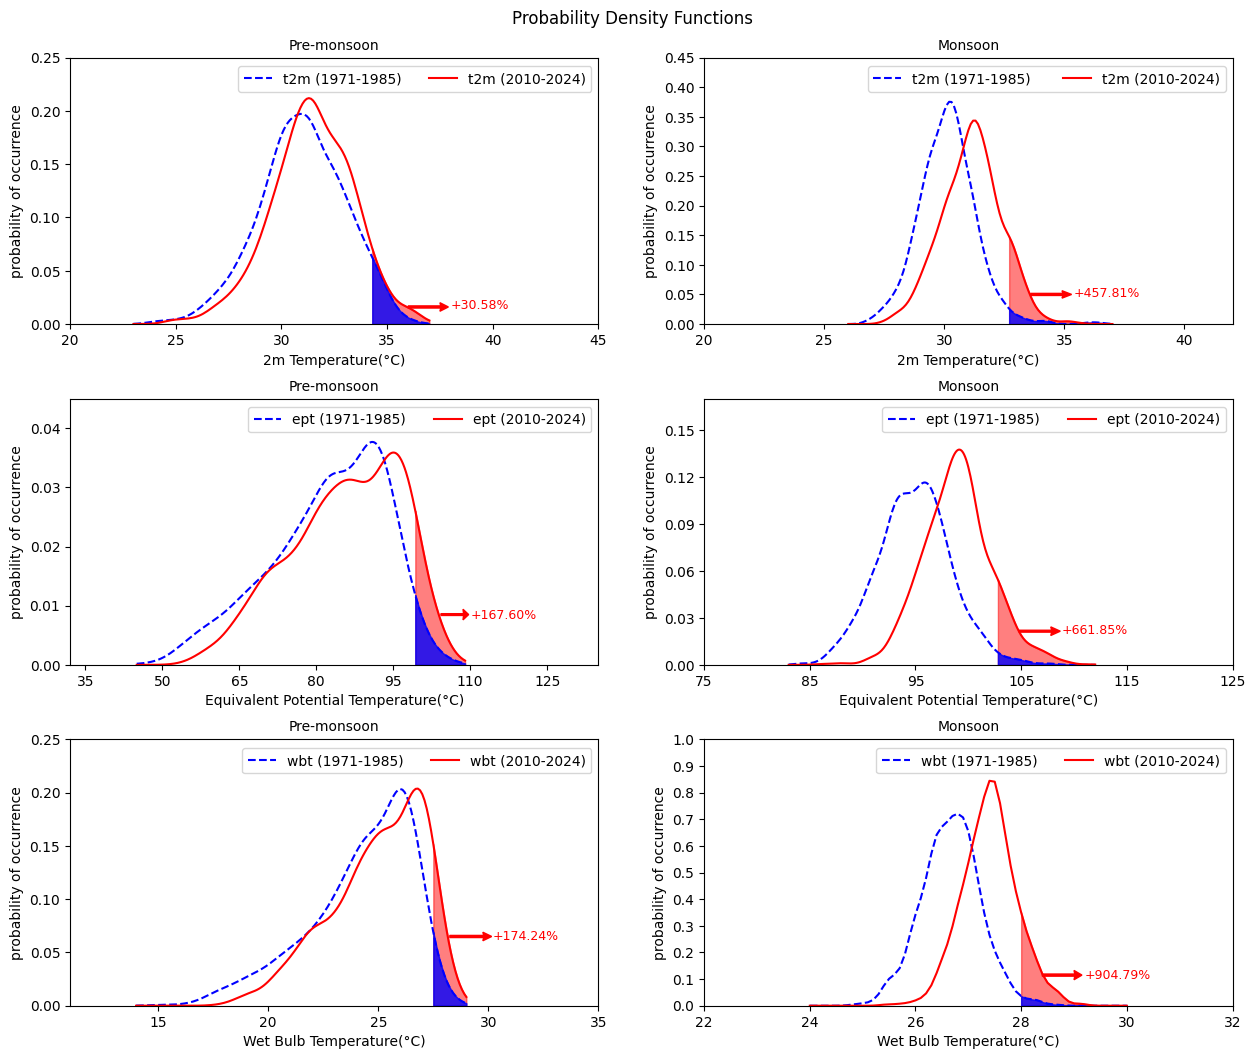

In [ ]:
#@title figure
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(15, 12))
axs=axs.flatten()

# First row: MAM data
df_1=df_mam[(df_mam['time'].dt.year >= 1971) & (df_mam['time'].dt.year <= 1985)]
df_2=df_mam[(df_mam['time'].dt.year >= 2010) & (df_mam['time'].dt.year <= 2024)]

# Evaluate KDE
t2m_mam_y_kde_1,t2m_mam_y_kde_2,t2m_x_vals = calculate_kde(df_1.t2m,df_2.t2m)
ept_mam_y_kde_1,ept_mam_y_kde_2,ept_x_vals = calculate_kde(df_1.ept,df_2.ept)
wbt_mam_y_kde_1,wbt_mam_y_kde_2,wbt_x_vals = calculate_kde(df_1.wbt,df_2.wbt)


# Plot using Matplotlib
axs[0].plot(t2m_x_vals, t2m_mam_y_kde_1,label=f't2m (1971-1985)',color='blue', linestyle='--')
axs[0].plot(t2m_x_vals, t2m_mam_y_kde_2, label='t2m (2010-2024)', color='red')
axs[0].fill_between(t2m_x_vals, t2m_mam_y_kde_2, where=(t2m_x_vals > np.nanpercentile(df_mam.t2m, 95)), color='red', alpha=0.5)
axs[0].fill_between(t2m_x_vals, t2m_mam_y_kde_1, where=(t2m_x_vals > np.nanpercentile(df_mam.t2m, 95)), color='blue', alpha=0.8)


axs[2].plot(ept_x_vals, ept_mam_y_kde_1, label='ept (1971-1985)', color='blue', linestyle='--')
axs[2].plot(ept_x_vals, ept_mam_y_kde_2, label='ept (2010-2024)', color='red')
axs[2].fill_between(ept_x_vals, ept_mam_y_kde_2, where=(ept_x_vals > np.nanpercentile(df_mam.ept, 95)), color='red', alpha=0.5)
axs[2].fill_between(ept_x_vals, ept_mam_y_kde_1, where=(ept_x_vals > np.nanpercentile(df_mam.ept, 95)), color='blue', alpha=0.8)

axs[4].plot(wbt_x_vals, wbt_mam_y_kde_1, label='wbt (1971-1985)', color='blue', linestyle='--')
axs[4].plot(wbt_x_vals, wbt_mam_y_kde_2, label='wbt (2010-2024)', color='red')
axs[4].fill_between(wbt_x_vals, wbt_mam_y_kde_2, where=(wbt_x_vals > np.nanpercentile(df_mam.wbt, 95)), color='red', alpha=0.5)
axs[4].fill_between(wbt_x_vals, wbt_mam_y_kde_1, where=(wbt_x_vals > np.nanpercentile(df_mam.wbt, 95)), color='blue', alpha=0.8)

increased_area=increase_in_filled_region(t2m_mam_y_kde_1,t2m_mam_y_kde_2,t2m_x_vals,t2m_x_vals > np.nanpercentile(df_mam.t2m, 95))
axs[0].annotate(f'+{increased_area:.2f}%', xy=(38, 0.014),fontsize=9, color='red',)

increased_area=increase_in_filled_region(ept_mam_y_kde_1,ept_mam_y_kde_2,ept_x_vals,ept_x_vals > np.nanpercentile(df_mam.ept, 95))
axs[2].annotate(f'+{increased_area:.2f}%', xy=(110, 0.0078),fontsize=9, color='red',)

increased_area=increase_in_filled_region(wbt_mam_y_kde_1,wbt_mam_y_kde_2,wbt_x_vals,wbt_x_vals > np.nanpercentile(df_mam.wbt, 95))
axs[4].annotate(f'+{increased_area:.2f}%', xy=(30.2, 0.062),fontsize=9, color='red',)

axs[0].arrow(x=36, y=0.016, dx=1.5, dy=0, width=.002,color='red',head_width=0.008,head_length=0.4,overhang=0.1)
axs[2].arrow(x=104.3, y=0.0085, dx=4.3, dy=0, width=.0003,color='red',head_width=0.0018,head_length=1.1,overhang=0.1)
axs[4].arrow(x=28.25, y=0.065, dx=1.5, dy=0, width=.002,color='red',head_width=0.008,head_length=0.4,overhang=0.1)


# # Set x-ticks
axs[0].set_xticks(np.arange(20, 45+1, 5))
axs[2].set_xticks(np.arange(35, 125+1, 15))
axs[4].set_xticks(np.arange(15, 35+1, 5))
axs[2].set_xlim(32, 135)
axs[4].set_xlim(11, 35)


# # Set y-ticks
axs[0].set_yticks(np.arange(0, 0.25 + 0.01, 0.05))
axs[2].set_yticks(np.arange(0, 0.045 + 0.001, 0.01))
axs[4].set_yticks(np.arange(0, 0.25 + 0.01, 0.05))
axs[0].set_ylim(0, 0.25)
axs[2].set_ylim(0, 0.045)
axs[4].set_ylim(0, 0.25)



# Labels and titles
axs[0].set_xlabel('2m Temperature(°C)')
axs[0].set_ylabel('probability of occurrence')
axs[0].set_title('Pre-monsoon',fontsize=10)

axs[2].set_xlabel('Equivalent Potential Temperature(°C)')
axs[2].set_ylabel('probability of occurrence')
axs[2].set_title('Pre-monsoon',fontsize=10)

axs[4].set_xlabel('Wet Bulb Temperature(°C)')
axs[4].set_ylabel('probability of occurrence')
axs[4].set_title('Pre-monsoon',fontsize=10)

# Add legends
axs[0].legend(loc='right',bbox_to_anchor=(1, 0.92),ncol=2)
axs[2].legend(loc='right',bbox_to_anchor=(1, 0.92),ncol=2)
axs[4].legend(loc='right',bbox_to_anchor=(1, 0.92),ncol=2)


# Second row: JJAS data
df_1=df_jjas[(df_jjas['time'].dt.year >= 1971) & (df_jjas['time'].dt.year <= 1985)]
df_2=df_jjas[(df_jjas['time'].dt.year >= 2010) & (df_jjas['time'].dt.year <= 2024)]

# Evaluate KDE
t2m_jjas_y_kde_1,t2m_jjas_y_kde_2,t2m_x_vals = calculate_kde(df_1.t2m,df_2.t2m)
ept_jjas_y_kde_1,ept_jjas_y_kde_2,ept_x_vals = calculate_kde(df_1.ept,df_2.ept)
wbt_jjas_y_kde_1,wbt_jjas_y_kde_2,wbt_x_vals = calculate_kde(df_1.wbt,df_2.wbt)


# quartiles
t2m_jjas_quartiles_1 = calculate_quartiles(df_1.t2m)
t2m_jjas_quartiles_2 = calculate_quartiles(df_2.t2m)
ept_jjas_quartiles_1 = calculate_quartiles(df_1.ept)
ept_jjas_quartiles_2 = calculate_quartiles(df_2.ept)
wbt_jjas_quartiles_1 = calculate_quartiles(df_1.wbt)
wbt_jjas_quartiles_2 = calculate_quartiles(df_2.wbt)

# Plot using Matplotlib
axs[1].plot(t2m_x_vals, t2m_jjas_y_kde_1, label=f't2m (1971-1985) ', color='blue', linestyle='--')
axs[1].plot(t2m_x_vals, t2m_jjas_y_kde_2, label='t2m (2010-2024)', color='red')
axs[1].fill_between(t2m_x_vals, t2m_jjas_y_kde_2, where=(t2m_x_vals > np.nanpercentile(df_jjas.t2m, 95)), color='red', alpha=0.5)
axs[1].fill_between(t2m_x_vals, t2m_jjas_y_kde_1, where=(t2m_x_vals > np.nanpercentile(df_jjas.t2m, 95)), color='blue', alpha=0.8)


axs[3].plot(ept_x_vals, ept_jjas_y_kde_1, label='ept (1971-1985)', color='blue', linestyle='--')
axs[3].plot(ept_x_vals, ept_jjas_y_kde_2, label='ept (2010-2024)', color='red')
axs[3].fill_between(ept_x_vals, ept_jjas_y_kde_2, where=(ept_x_vals > np.nanpercentile(df_jjas.ept, 95)), color='red', alpha=0.5)
axs[3].fill_between(ept_x_vals, ept_jjas_y_kde_1, where=(ept_x_vals > np.nanpercentile(df_jjas.ept, 95)), color='blue', alpha=0.8)

axs[5].plot(wbt_x_vals, wbt_jjas_y_kde_1, label='wbt (1971-1985)', color='blue', linestyle='--')
axs[5].plot(wbt_x_vals, wbt_jjas_y_kde_2, label='wbt (2010-2024)', color='red')
axs[5].fill_between(wbt_x_vals, wbt_jjas_y_kde_2, where=(wbt_x_vals > np.nanpercentile(df_jjas.wbt, 95)), color='red', alpha=0.5)
axs[5].fill_between(wbt_x_vals, wbt_jjas_y_kde_1, where=(wbt_x_vals > np.nanpercentile(df_jjas.wbt, 95)), color='blue', alpha=0.8)

increased_area=increase_in_filled_region(t2m_jjas_y_kde_1,t2m_jjas_y_kde_2,t2m_x_vals,t2m_x_vals > np.nanpercentile(df_jjas.t2m, 95))
axs[1].annotate(f'+{increased_area:.2f}%', xy=(35.4, 0.046),fontsize=9, color='red',)

increased_area=increase_in_filled_region(ept_jjas_y_kde_1,ept_jjas_y_kde_2,ept_x_vals,ept_x_vals > np.nanpercentile(df_jjas.ept, 95))
axs[3].annotate(f'+{increased_area:.2f}%', xy=(108.85, 0.02),fontsize=9, color='red',)

increased_area=increase_in_filled_region(wbt_jjas_y_kde_1,wbt_jjas_y_kde_2,wbt_x_vals,wbt_x_vals > np.nanpercentile(df_jjas.wbt, 95))
axs[5].annotate(f'+{increased_area:.2f}%', xy=(29.2, 0.1),fontsize=9, color='red',)

axs[1].arrow(x=33.6, y=0.05, dx=1.3, dy=0, width=.0035,color='red',head_width=0.0125,head_length=0.4,overhang=0.1)
axs[3].arrow(x=104.8, y=0.0215, dx=3, dy=0, width=.0012,color='red',head_width=0.0055,head_length=0.9,overhang=0.1)
axs[5].arrow(x=28.4, y=0.115, dx=0.6, dy=0, width=.008,color='red',head_width=0.035,head_length=0.15,overhang=0.1)



# # Set x-ticks
axs[1].set_xticks(np.arange(20, 42+1, 5))
axs[3].set_xticks(np.arange(75, 130+1, 10))
axs[5].set_xticks(np.arange(22, 32+1, 2))
axs[1].set_xlim(20, 42)


# # Set y-ticks
axs[1].set_yticks(np.arange(0, 0.45 + 0.01, 0.05))
axs[3].set_yticks(np.arange(0, 0.18 + 0.01, 0.03))
axs[5].set_yticks(np.arange(0, 1 + 0.01, 0.1))
axs[1].set_ylim(0, 0.45)
axs[3].set_ylim(0, 0.17)
axs[5].set_ylim(0, 1)


# Labels and titles
axs[1].set_xlabel('2m Temperature(°C)')
axs[1].set_ylabel('probability of occurrence')
axs[1].set_title('Monsoon',fontsize=10)

axs[3].set_xlabel('Equivalent Potential Temperature(°C)')
axs[3].set_ylabel('probability of occurrence')
axs[3].set_title('Monsoon',fontsize=10)

axs[5].set_xlabel('Wet Bulb Temperature(°C)')
axs[5].set_ylabel('probability of occurrence')
axs[5].set_title('Monsoon',fontsize=10)

# Add legends
axs[1].legend(loc='right',bbox_to_anchor=(1, 0.92),ncol=2)
axs[3].legend(loc='right',bbox_to_anchor=(1, 0.92),ncol=2)
axs[5].legend(loc='right',bbox_to_anchor=(1, 0.92),ncol=2)

plt.subplots_adjust( wspace=0.2,hspace=0.28,top=0.9)
plt.suptitle('Probability Density Functions',y=0.94,fontsize=12)

plt.show()